In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

In [16]:
dtype = {'背番号': str}
df = pd.read_csv('data_collection/salaries/batter.csv', index_col=0, dtype=dtype)
df.head()

,背番号,名前,年俸,打率,試合数,打席数,打数,安打,二塁打,三塁打,...,打点,三振,四球,死球,盗塁,出塁率,長打率,OPS,三振率,チーム名
0,00,曽根海成,1300.0,0.143,39.0,15.0,14.0,2.0,1.0,0.0,...,0.0,3.0,1.0,0.0,1.0,0.200,0.214,0.414,0.200,広島
1,0,上本崇司,2900.0,0.259,84.0,276.0,247.0,64.0,7.0,1.0,...,17.0,46.0,12.0,9.0,8.0,0.317,0.308,0.625,0.167,広島
2,2,田中広輔,3000.0,0.228,111.0,253.0,224.0,51.0,10.0,0.0,...,28.0,48.0,25.0,1.0,2.0,0.308,0.353,0.661,0.190,広島
3,5,西川龍馬,12000.0,0.305,109.0,443.0,416.0,127.0,20.0,1.0,...,56.0,52.0,21.0,1.0,7.0,0.337,0.423,0.760,0.117,広島
4,7,堂林翔太,5000.0,0.273,100.0,284.0,260.0,71.0,13.0,0.0,...,35.0,72.0,19.0,0.0,1.0,0.323,0.462,0.784,0.254,広島


In [17]:
df.columns

Index(['背番号', '名前', '年俸', '打率', '試合数', '打席数', '打数', '安打', '二塁打', '三塁打', '本塁打',
       '塁打数', '得点', '打点', '三振', '四球', '死球', '盗塁', '出塁率', '長打率', 'OPS', '三振率',
       'チーム名'],
      dtype='object')

In [18]:
# convert column names into English
col_eng = [
    'uniform_num','name', 'ann_salary_x10000', 'average', 'games', 'plate_appearance', 'at_bat', 'hit', '2B', '3B', 'HR', 'total_bases', 'run_scored', 'RBI', 'strikeout', 'walk', 'hit_by_pitch', 'stolen_base', 'on_base_pct', 'slugging_pct', 'OPS', 'k/9', 'team_name'
]
df.columns = col_eng
df.columns

Index(['uniform_num', 'name', 'ann_salary_x10000', 'average', 'games',
       'plate_appearance', 'at_bat', 'hit', '2B', '3B', 'HR', 'total_bases',
       'run_scored', 'RBI', 'strikeout', 'walk', 'hit_by_pitch', 'stolen_base',
       'on_base_pct', 'slugging_pct', 'OPS', 'k/9', 'team_name'],
      dtype='object')

## Money spent per win

In [19]:
tot_salaries = df.groupby('team_name')['ann_salary_x10000'].sum()
tot_salaries

team_name
DeNA      181130.0
オリックス     137090.0
ソフトバンク    295000.0
ヤクルト      249700.0
ロッテ       125690.0
中日        141615.0
巨人        279010.0
広島        154650.0
日本ハム       86435.0
楽天        179160.0
西武        181240.0
阪神        135440.0
Name: ann_salary_x10000, dtype: float64

In [34]:
standing_df = pd.read_csv('data_collection/standings/2023_final_standings.csv')
standing_df.head()

,ID,Year,Season,HomeTeam,VisitorTeam,Matchday,GameCD,League,Ranking,TeamCD,...,Homerun,StolenBase,BattingAverage,EarnedRunAverage,RestGame,Winner_Magic,POLastRanking,RankShiftF,UpdatedAt,CreatedAt
0,40240,2023,NaN,NaN,NaN,20231010,NaN,Pacific,1,11,...,109,52,0.250,2.73,0,0,NaN,0,2023-10-10T12:48:24.000Z,2023-10-10T12:48:24.000Z
1,40241,2023,NaN,NaN,NaN,20231010,NaN,Pacific,2,9,...,100,73,0.239,3.40,0,-1,NaN,1,2023-10-10T12:48:24.000Z,2023-10-10T12:48:24.000Z
2,40242,2023,NaN,NaN,NaN,20231010,NaN,Pacific,3,12,...,104,73,0.248,3.27,0,-1,NaN,2,2023-10-10T12:48:24.000Z,2023-10-10T12:48:24.000Z
3,40243,2023,NaN,NaN,NaN,20231010,NaN,Pacific,4,376,...,104,102,0.244,3.52,0,-1,NaN,0,2023-10-10T12:48:24.000Z,2023-10-10T12:48:24.000Z
4,40244,2023,NaN,NaN,NaN,20231010,NaN,Pacific,5,7,...,90,80,0.233,2.93,0,-1,NaN,0,2023-10-10T12:48:24.000Z,2023-10-10T12:48:24.000Z


In [35]:
standing_df.columns

Index(['ID', 'Year', 'Season', 'HomeTeam', 'VisitorTeam', 'Matchday', 'GameCD',
       'League', 'Ranking', 'TeamCD', 'ShortName_Team', 'Game', 'Win', 'Lose',
       'Draw', 'WinningPercentage', 'GameBehind', 'GameBehindTop', 'Run',
       'PointLost', 'Homerun', 'StolenBase', 'BattingAverage',
       'EarnedRunAverage', 'RestGame', 'Winner_Magic', 'POLastRanking',
       'RankShiftF', 'UpdatedAt', 'CreatedAt'],
      dtype='object')

In [36]:
standing_df = standing_df[['ShortName_Team', 'League', 'Ranking', 'Game', 'Win', 'Lose', 'Draw']]
standing_df.rename(columns={'ShortName_Team':'Team'}, inplace=True)
standing_df

,Team,League,Ranking,Game,Win,Lose,Draw
0,オリックス,Pacific,1,143,86,53,4
1,ロッテ,Pacific,2,143,70,68,5
2,ソフトバンク,Pacific,3,143,71,69,3
3,楽天,Pacific,4,143,70,71,2
4,西武,Pacific,5,143,65,77,1
5,日本ハム,Pacific,6,143,60,82,1
6,阪神,Central,1,143,85,53,5
7,広島,Central,2,143,74,65,4
8,DeNA,Central,3,143,74,66,3
9,巨人,Central,4,143,71,70,2


In [37]:
standing_df['Total_salary'] = standing_df['Team'].map(tot_salaries)
standing_df

,Team,League,Ranking,Game,Win,Lose,Draw,Total_salary
0,オリックス,Pacific,1,143,86,53,4,137090.0
1,ロッテ,Pacific,2,143,70,68,5,125690.0
2,ソフトバンク,Pacific,3,143,71,69,3,295000.0
3,楽天,Pacific,4,143,70,71,2,179160.0
4,西武,Pacific,5,143,65,77,1,181240.0
5,日本ハム,Pacific,6,143,60,82,1,86435.0
6,阪神,Central,1,143,85,53,5,135440.0
7,広島,Central,2,143,74,65,4,154650.0
8,DeNA,Central,3,143,74,66,3,181130.0
9,巨人,Central,4,143,71,70,2,279010.0


In [38]:
standing_df['Pay_per_win'] = standing_df['Total_salary'] / standing_df['Win']
standing_df

,Team,League,Ranking,Game,Win,Lose,Draw,Total_salary,Pay_per_win
0,オリックス,Pacific,1,143,86,53,4,137090.0,1594.069767
1,ロッテ,Pacific,2,143,70,68,5,125690.0,1795.571429
2,ソフトバンク,Pacific,3,143,71,69,3,295000.0,4154.929577
3,楽天,Pacific,4,143,70,71,2,179160.0,2559.428571
4,西武,Pacific,5,143,65,77,1,181240.0,2788.307692
5,日本ハム,Pacific,6,143,60,82,1,86435.0,1440.583333
6,阪神,Central,1,143,85,53,5,135440.0,1593.411765
7,広島,Central,2,143,74,65,4,154650.0,2089.864865
8,DeNA,Central,3,143,74,66,3,181130.0,2447.702703
9,巨人,Central,4,143,71,70,2,279010.0,3929.718310


In [39]:
standing_df.dtypes

Team             object
League           object
Ranking           int64
Game              int64
Win               int64
Lose              int64
Draw              int64
Total_salary    float64
Pay_per_win     float64
dtype: object

In [51]:
# color_mapping = {'Central': 'green', 'Pacific': 'blue'} # official theme colors
# scatter = plt.scatter(standing_df['Ranking'], standing_df['Pay_per_win'], c=standing_df['League'].map(color_mapping))
# plt.colorbar(scatter, ticks=np.unique(standing_df['League']), label='League')

# plt.xlabel('Ranking')
# plt.ylabel('Money spent per win (10,000 yen)')

Text(0, 0.5, 'Money spent per win (10,000 yen)')

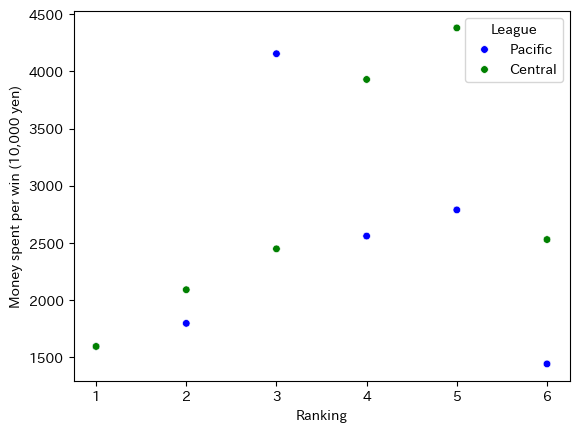

In [63]:
hue_colors = {'Central': 'green', 'Pacific': 'blue'} # official theme colors
ax = sns.scatterplot(x='Ranking', y='Pay_per_win', data=standing_df, hue='League', palette=hue_colors, s=30)
ax.set_ylabel('Money spent per win (10,000 yen)')

In [ ]:
# where's 1st place team for Pacific league? (Olix Buffalos)